In [5]:
%matplotlib inline

In [6]:
import os
import struct
import numpy as np

ファイルの内容を読み出すには、 f.read(size) を呼び出します。このメソッドはある量のデータを読み出して、文字列として返します。 size は省略可能な数値引数です。 size が省略されたり負の数であった場合、ファイルの内容全てを読み出して返します。ただし、ファイルがマシンのメモリの二倍の大きさもある場合にはどうなるかわかりません。 size が負でない数ならば、最大で size バイトを読み出して返します。ファイルの終端にすでに達していた場合、 f.read() は空の文字列 ("") を返します。
http://docs.python.jp/2/tutorial/inputoutput.html

ビッグエンディアン(>)     2バイト以上のデータ量を持つ数値データを記録したり転送するときには1バイトごとに分割するが、これを最上位のバイトから順番に記録/送信する方式

In [16]:
def load_mnist(path, kind='train'):
    """MNISTデータをpathからロード"""
    #引数を指定したパスを結合(ラベルや画像のパスを作成)
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' %kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' %kind)
    
    #ファイルを読み込む:
    #引数にファイル、モードを指定
    with open(labels_path, 'rb') as lbpath:
        #バイナリーを文字列に変換: unpack関数の引数にフォーマット(>はビッグエンディアン、Iは符号なし整数)、
        #８バイト分のバイナリーデータを指定してマジックナンバー、アイテムの個数を読み込む
        #ヘッダ領域が 8 バイト
        magic, n = struct.unpack('>II', lbpath.read(8))
        #ファイルからラベルを読み込み、配列を構築: fromfile関数の引数にファイル、配列のデータ形式を指定
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        #ヘッダ領域が 16 バイト
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        #画像ピクセル情報の配列のサイズを変更
        # (行数:ラベルのサイズ, 列数:特徴量の個数)
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

mnistのラベルデータは最初の8バイト(数値二つ)はマジックナンバーと個数が格納されているからstruct.unpackで読み込む
その後は、ラベルデータが並んでいるのでnp.fromfileで読み込む。
EX) 2049, 60000, 2,3,4,3,6,8,3,1,1,,,,,という感じ。
イメージの方は28×28ピクセルのデータなので一つのデータ(一行)に784個数値が入る。

In [8]:
X_train, y_train = load_mnist('/Users/keeeeei/Desktop/データ分析/Python機械学習プログラミング/mnist', kind='train')
print('Rows: %d, columns: %d' %(X_train.shape[0], X_train.shape[1]))
X_test, y_test = load_mnist('/Users/keeeeei/Desktop/データ分析/Python機械学習プログラミング/mnist', kind='t10k')
print('Rows: %d, columns: %d' %(X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


In [15]:
y_train[0]

5

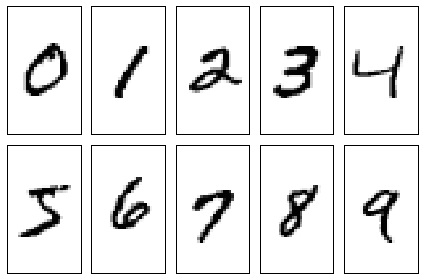

In [12]:
import matplotlib.pyplot as plt
#subplotsで描画の設定
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten() #配列を１次元に変形
for i in range(10):
    img = X_train[y_train==i][0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest') #色や補間方法を指定
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

0%                     100%
[#########################] | ETA: 00:00:00
Total time elapsed: 00:00:01


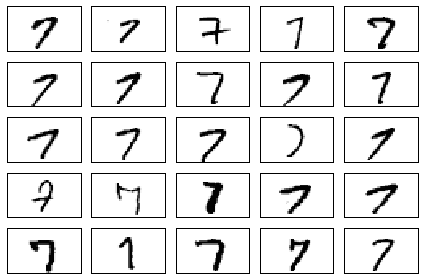

In [11]:
import pyprind
import matplotlib.pyplot as plt
pbar = pyprind.ProgBar(25)
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    pbar.update()
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
#np.savetxt('train_img.csv', X_train, fmt='%i', delimeter=',')
#np.savetxt('train_labels.csv', y_train, fmt='%i', delimeter=',')
#np.savetxt('test_img.csv', X_test, fmt='%i', delimeter=',')
#np.savetxt('test_labels.csv', y_test, fmt='%i', delimeter=',')

In [ ]:
#X_train = np.genfromtxt('train_img.csv', dtype=int, delimeter=',')
#y_train = np.genfromtxt('train_labels.csv', dtype=int, delimeter=',')
#X_test = np.genfromtxt('test_img.csv', dtype=int, delimeter=',')
#y_test = np.genfromtxt('test_labels.csv', dtype=int, delimeter=',')

In [7]:
from neuralnet import NeuralNetMLP

nn = NeuralNetMLP(n_output=10,n_features=X_train.shape[1], n_hidden=50, l2=0.1, l1=0.0, epochs=1000,
                 eta = 0.001, alpha=0.001, decrease_const= 0.00001, shuffle = True, minibatches=50, random_state=1)

#nn.fit(X_train, y_train, print_progress=True)

In [8]:
nn.get_params()

{'alpha': 0.001,
 'decrease_const': 1e-05,
 'epochs': 1000,
 'eta': 0.001,
 'l1': 0.0,
 'l2': 0.1,
 'minibatches': 50,
 'n_features': 784,
 'n_hidden': 50,
 'n_output': 10,
 'random_state': None,
 'shuffle': True}

In [11]:
lis =[nn.w1, nn.w2, nn.l1]

In [12]:
#シリアライズ化
import pickle
#pickle.dump(nn, open('NeuralNetMLP.pkl', 'wb'), protocol=4)

#デシリアライズ化
import pickle
nn = pickle.load(open('NeuralNetMLP.pkl', 'rb'))

In [7]:
import matplotlib.pyplot as plt

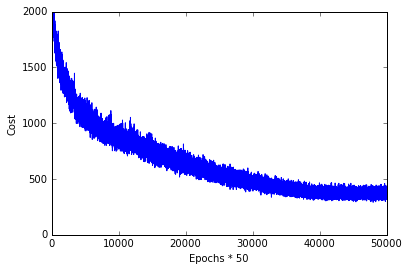

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0,2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.show()

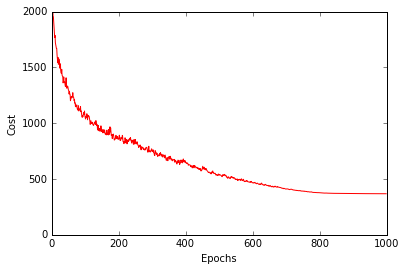

In [15]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
#各ミニバッチごとに平均をとる
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [20]:
#関数の引数を調べる
import inspect
inspect.signature(accuracy_score)

<Signature (y_true, y_pred, normalize=True, sample_weight=None)>

In [21]:
#予測の正解率
from sklearn.metrics import accuracy_score
y_train_pred = nn.predict(X_train)
acc = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print('Training accuracy %.2f%%' % (acc*100))

Training accuracy 97.59%


In [22]:
y_test_pred = nn.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('Test accuracy %.2f%%' % (acc*100))

Test accuracy 95.62%


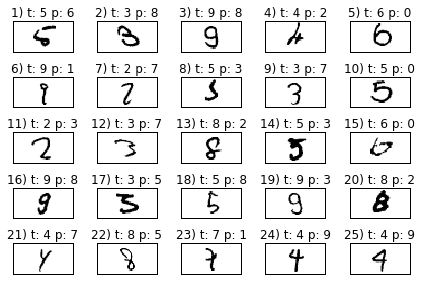

In [24]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]
fig, ax =plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

人工ニューラルネットワークをトレーニングする

In [7]:
nn.w1

array([[-0.16364874,  0.0607056 , -0.13773256, ..., -0.04950708,
         0.13293984,  0.03755618],
       [-0.27338799,  0.09849704,  0.03294951, ...,  0.06666115,
        -0.06618415,  0.02238262],
       [ 0.89842764, -0.1155141 , -0.11474805, ..., -0.06080346,
         0.1145863 , -0.0831455 ],
       ..., 
       [ 0.75884229, -0.12801924,  0.0704399 , ...,  0.01144414,
        -0.11315398, -0.01738838],
       [-0.99445684, -0.00631891, -0.08910169, ..., -0.02578472,
         0.09995762,  0.00688711],
       [-0.35976493, -0.09559508,  0.09533742, ...,  0.09513292,
        -0.07255643, -0.11773501]])

In [31]:
def _get_gradient(a1, a2, a3, z2, y_enc, w1, w2):
        #バックプロバゲーション
        sigma3 = a3 - y_enc
        z2 = _add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * _sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)
        #正則化
        grad1[:, 1:] += (w1[:, 1:]*(nn.l1 + nn.l2))
        grad2[:, 1:] += (w2[:, 1:]*(nn.l1 + nn.l2))
        return grad1, grad2, sigma3, sigma2

In [45]:
sigma3 = a3 - y_enc
"""z2 = _add_bias_unit(z2, how='row')
sigma2 = nn.w2.T.dot(sigma3) * _sigmoid_gradient(z2)
sigma2 = sigma2[1:, :]
grad1 = sigma2.dot(a1)"""
grad2 = sigma3.dot(a2.T)

In [47]:
sigma3.shape

(10, 100)

In [48]:
a2.shape

(51, 100)

In [46]:
grad2.shape

(10, 51)

In [35]:
grad2.shape

NameError: name 'grad2' is not defined

In [34]:
#バックプロバゲーションによる勾配の計算
grad1, grad2, sigma3, sigma2 = _get_gradient(a1=a1, a2=a2, a3=a3, z2=z2, y_enc=y_enc,
                                                 w1 = nn.w1, w2 = nn.w2)

ValueError: operands could not be broadcast together with shapes (51,100) (53,100) 

In [13]:
def feedforward(X, w1, w2):
    #一層目
    a1 = _add_bias_unit(X, how='column')
        #二層目
    z2 = w1.dot(a1.T)
    a2 = sigmoid(z2)
    a2 = _add_bias_unit(a2, how='row')
    #三層目
    z3 = w2.dot(a2)
    a3 = sigmoid(z3)
    return a1, z2, a2, z3, a3
    

In [11]:
def _add_bias_unit(X, how='column'):
    
    if how == 'column':
        X_new = np.ones((X.shape[0], X.shape[1] + 1))
        X_new[:, 1:] = X
    elif how == 'row':
        X_new = np.ones((X.shape[0] + 1, X.shape[1]))
        X_new[1:, :] = X
    else:
        raise AttributeError('`how` must be `column` or `row`')
    return X_new

In [10]:
import numpy as np
from scipy.special import expit
import sys
from sklearn.base import BaseEstimator
def sigmoid(z):
    return expit(z) #expitは1.0/(1.0 + np.exp(-z))に等しい

In [12]:
def _sigmoid_gradient(z):
    sg = sigmoid(z)
    return sg * (1.0 - sg)

In [44]:
a1, z2, a2, z3, a3 = feedforward(X_train[:100], nn.w1, nn.w2)

In [21]:
print([i.shape for i in [a1, z2, a2, z3, a3]])

[(100, 785), (50, 100), (51, 100), (10, 100), (10, 100)]


In [18]:
X_train[:100].shape

(100, 784)

In [23]:
nn.w1.shape

(50, 785)

In [38]:
def _encode_labels(y, k):
    onehot = np.zeros((k, y.shape[0]))
    for idx, val in enumerate(y):
        onehot[val, idx] = 1.0
    return onehot
y_enc = _encode_labels(y_train[:100], 10)

In [16]:
from neuralnet_add import MLPGradientCheck
nn_check = MLPGradientCheck(n_output=10,n_features=X_train.shape[1], n_hidden=10, l2=0.0, l1=0.0, epochs=10,
                 eta = 0.001, alpha=0.0, decrease_const= 0.0, shuffle = False, minibatches=1, random_state=1)
nn_check.fit(X_train[:5], y_train[:5], print_progress=False)

Ok: 2.55068505986e-10
Ok: 2.93547837023e-10
Ok: 2.37449571314e-10
Ok: 3.08194323691e-10
Ok: 3.38249440642e-10
Ok: 3.57890221135e-10
Ok: 2.19231256383e-10
Ok: 2.36583740198e-10
Ok: 3.43584860701e-10
Ok: 2.13345208113e-10


MLPGradientCheck(alpha=0.0, decrease_const=0.0, epochs=10, eta=0.001, l1=0.0,
         l2=0.0, minibatches=1, n_features=784, n_hidden=10, n_output=10,
         random_state=None, shuffle=False)

In [17]:
#数値勾配と解析的勾配の列ベクトル化
num_grad = np.hstack(([1,1],[2,2]))
grad = np.hstack(([3,3],[4,4]))
#数値勾配と解析的勾配の差のノルム
norm1= np.linalg.norm(num_grad - grad)
#数値勾配のノルム
norm2= np.linalg.norm(num_grad)
#解析的勾配のノルム
norm3= np.linalg.norm(grad)
#相対誤差を計算
relative_error = norm1 / (norm2 + norm3)
    

In [18]:
norm2

3.1622776601683795

In [21]:
(np.sum(num_grad**2))**0.5

3.1622776601683795

In [22]:
relative_error

0.39087901516970958

In [23]:
norm1

4.0

In [13]:
np.array([1,2,3,4]).reshape(2,2)

array([[1, 2],
       [3, 4]])